# **IMPORTS/COMFIGIRAÇÕES**

In [2]:
# Bibliotecas de manipulação
import numpy as np  # Manipulação de matrizes
import pandas as pd  # Manipulação de dados tabulares
# Bibliotecas de visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Bibliotecas próprias
from PROJECT_LIBRARY.Data_extraction import *  # Biblioteca própria para extração dos dados
from PROJECT_LIBRARY.Data_transformation import *  # Biblioteca própria para transformação dos dados
# Biblioteca de filtro de notificações
import warnings



warnings.filterwarnings(action='ignore')
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
pd.options.display.float_format = lambda x: f'{x:,.2f}'
px.defaults.template = 'plotly_dark'
sns.set_theme()

In [2]:
upgrade_data(fold='./RAW_DATAS')

Arquivo 2024 desatualizado, refazendo download.


# **ANÁLISE DESCRITIVA**

In [3]:
df = pd.read_parquet('./DATASETS/consolidated_data.parquet')
df.head(5)

,COMPETÊNCIA,A_E_AFE_EC123,A_E_COUN,A_E_COUN_VAAF,A_E_COUN_VAAR,A_E_COUN_VAAT,A_E_FPE,A_E_FPM,A_E_ICMS,A_E_IPI,A_E_IPVA,A_E_ITCMD,A_E_ITR,A_E_LC8796,A_M_AFE_EC123,A_M_COUN,A_M_COUN_VAAF,A_M_COUN_VAAR,A_M_COUN_VAAT,A_M_FPE,A_M_FPM,A_M_ICMS,A_M_IPI,A_M_IPVA,A_M_ITCMD,A_M_ITR,A_M_LC8796,E_AFE_EC123,E_Ajuste,E_COUN,E_COUN_VAAF,E_COUN_VAAR,E_COUN_VAAT,E_FPE,E_FPM,E_ICMS,E_IPI,E_IPVA,E_ITCMD,E_ITR,E_LC8796,M_AFE_EC123,M_Ajuste,M_COUN,M_COUN_VAAF,M_COUN_VAAR,M_COUN_VAAT,M_FPE,M_FPM,M_ICMS,M_IPI,M_IPVA,M_ITCMD,M_ITR,M_LC8796,UF
0,2007-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"9,679,990.36","1,582,026.94","3,147,424.17","3,548.46",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,783,401.60","945,196.85","1,880,458.38","2,120.06",0.00,0.00,0.00,0.00,AC
1,2007-02-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,403,223.77","1,679,745.89","2,808,851.47","3,436.84",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"6,215,504.20","1,003,580.12","1,678,174.91","2,053.38",0.00,0.00,0.00,0.00,AC
2,2007-03-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"9,651,689.64","1,558,400.17","3,011,403.44","3,581.26",0.00,0.00,149.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,659,573.65","913,817.32","1,765,831.67","2,099.96",0.00,0.00,87.85,0.00,AC
3,2007-04-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"14,365,469.31","2,454,423.21","3,459,334.23","5,061.55",0.00,0.00,796.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"8,201,169.90","1,403,095.45","1,962,507.48","2,890.64",0.00,0.00,466.80,0.00,AC
4,2007-05-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"12,372,140.35","1,997,655.42","2,711,046.74","4,060.74",0.00,0.00,552.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"7,254,796.00","1,171,388.22","1,589,708.05","2,381.16",0.00,0.00,323.98,0.00,AC


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163296 entries, 0 to 163295
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ESFERA         163296 non-null  category      
 1   UF             163296 non-null  category      
 2   COMPETÊNCIA    163296 non-null  datetime64[us]
 3   REPASSE        163296 non-null  category      
 4   TOTAL AJUSTE   163296 non-null  float64       
 5   TOTAL LIQUIDO  163296 non-null  float64       
 6   CATEGORIA      163296 non-null  category      
dtypes: category(4), datetime64[us](1), float64(2)
memory usage: 4.4 MB


In [4]:
df.memory_usage()

Index                132
ESFERA            163420
UF                164584
COMPETÊNCIA      1306368
REPASSE           163964
TOTAL AJUSTE     1306368
TOTAL LIQUIDO    1306368
CATEGORIA         163684
dtype: int64

## VARIÁVEIS NUMÉRICAS

In [9]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['TOTAL AJUSTE', 'TOTAL LIQUIDO']


In [31]:
df.describe()

TIPO DE REPASSE,COMPETÊNCIA,TOTAL AJUSTE,TOTAL LIQUIDO
count,163296,"163,296.00","163,296.00"
mean,2015-12-16 10:53:20,"68,091.21","14,763,894.63"
min,2007-01-01 00:00:00,"-213,329,018.65","-177,097,598.83"
25%,2011-06-23 12:00:00,0.00,0.00
50%,2015-12-16 12:00:00,0.00,"6,925.55"
75%,2020-06-08 12:00:00,0.00,"4,585,400.58"
max,2024-12-01 00:00:00,"696,137,219.82","2,431,147,109.50"
std,NaN,"4,550,686.55","70,659,385.27"


### Tratamentos

In [27]:
# Tratamento de constantes 
# - (Não foram identificadas constantes entre os dados)

# Tratamento de duplicados
# df[df.duplicated()]
# - (Não foram identificadas registros duplicados entre os dados)

# Tratamento de valores ausentes
# df.loc[df.isnull().any(axis=1)]
# - (Não foram identificadas registros ausentes entre os dados)

# Tratamento de valores inconsistentes ou sujos
# - Foram identificados valores negativos que representam ajustes e não se tratam de irregulares 
# df.loc[(df['TOTAL LIQUIDO'] < 0) & (df['CATEGORIA']!='Outros')]
# df.loc[(df['ESFERA']=='Estadual') & (df['UF']=='PB') & (df['COMPETÊNCIA']>='2023-01-01') & (df['COMPETÊNCIA']<='2023-12-31')]['TOTAL AJUSTE'].sum()
# - Não se sabe o motivo desses ajustes, entretanto, para os montantes corretos de 'total de ajuste' e 'total liquido', estes devem ser considerados negativos

### Distribuição

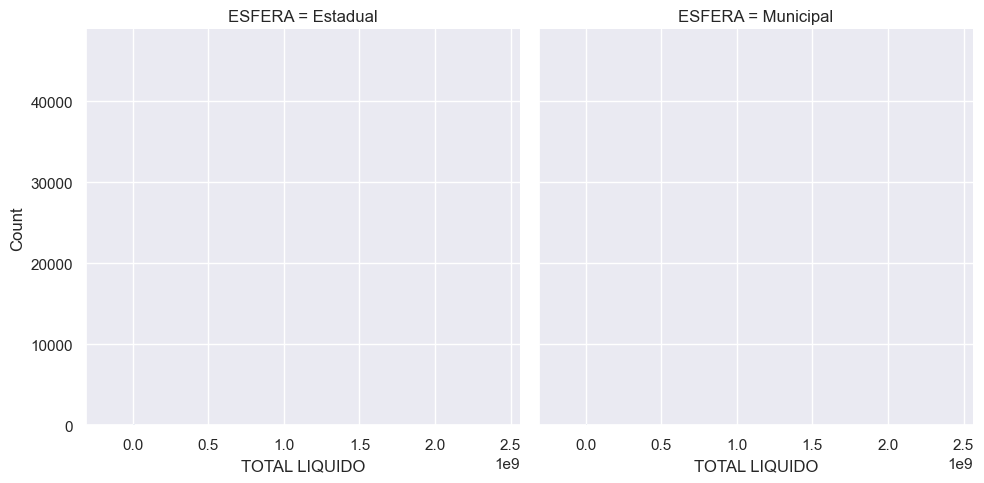

In [11]:
sns.displot(
    data=df,
    x='TOTAL LIQUIDO',
    col='ESFERA'
)

## VARIÁVEIS CATEGÓRICAS

In [30]:
cat_vars = df.select_dtypes(include=['category']).columns.to_list()
cat_vars

['ESFERA', 'UF', 'REPASSE', 'CATEGORIA']

In [31]:
df.describe(include='category')

TIPO DE REPASSE,ESFERA,UF,REPASSE,CATEGORIA
count,163296,163296,163296,163296
unique,2,27,14,11
top,Estadual,AC,AFE_EC123,Outros
freq,81648,6048,11664,46656


In [39]:
for cat in cat_vars:
    print(cat, sorted(df[cat].unique().to_list()))

ESFERA ['Estadual', 'Municipal']
UF ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']
REPASSE ['AFE_EC123', 'Ajuste', 'COUN', 'COUN_VAAF', 'COUN_VAAR', 'COUN_VAAT', 'FPE', 'FPM', 'ICMS', 'IPI', 'IPVA', 'ITCMD', 'ITR', 'LC8796']
CATEGORIA ['Complementação VAAF', 'Complementação VAAR', 'Complementação VAAT', 'FPE', 'FPM', 'ICMS', 'IPI', 'IPVA', 'ITCMD', 'ITR', 'Outros']


x - Distribuição dos valores mensais (boxplot)

In [9]:
df_temp = df_e.copy()
df_temp = df_temp.resample('m').sum()

fig = px.box(data_frame=df_temp, x=['TOTAL LIQUIDO'], points='all', hover_name=df_temp.index)
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='y', xaxis_tickformat=',.2f')
fig.show()

x - Valor total dos repasses por ano

In [3]:
df_temp = df_e.copy()
df_temp = df_temp.resample(rule='y').sum(numeric_only=True)

fig = px.line(data_frame=df_temp,  y='TOTAL LIQUIDO', x=df_temp.index.year, title='Total de repasses efetuados aos estados por ano de 2007 a 09-2023', markers='.')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2s')
fig.show()

x - Valor total dos repasses por mês (tendência, velocidade e aceleração)

In [28]:
df_temp = df_e.copy()
filtro = df_temp.UF == 'AP'
df_temp = df_temp[filtro].resample(rule='M').sum(numeric_only=True)
df_temp['MEDIA MOVEL'] = df_temp['TOTAL LIQUIDO'].rolling(window=12).mean()

fig = px.line(data_frame=df_temp,  y=['TOTAL LIQUIDO', 'MEDIA MOVEL'], x=df_temp.index, title='Total de repasses efetuados aos estados por mês de 01-2007 a 09-2023')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

x - Estacionariedade e ruido

In [12]:
df_temp = df_e.copy()
df_temp = df_temp.resample(rule='m').sum(numeric_only=True)
df_temp['DIFERENCIAÇÃO'] = df_temp['TOTAL LIQUIDO'].diff(1)

fig = px.bar(data_frame=df_temp, x=df_temp.index, y=['DIFERENCIAÇÃO'])
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

x - Sazonalidade

In [18]:
df_temp = df_e.copy()
df_temp = df_temp.resample(rule='m').sum(numeric_only=True)
df_temp['MEDIA MOVEL'] = df_temp['TOTAL LIQUIDO'].rolling(window=7).mean()
df_temp['SAZONALIDADE'] = df_temp['TOTAL LIQUIDO'].diff(1)
df_temp = df_temp['SAZONALIDADE'].groupby(df_temp.index.month).mean()

fig = px.bar(data_frame=df_temp, x=df_temp.index, y=['SAZONALIDADE'])
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

x - Média anual dos repasses por estados

In [16]:
df_temp = df_e.copy()
df_temp = df_temp.groupby('UF').resample(rule='Y').sum(numeric_only=True).reset_index(level=0)
df_temp = df_temp.groupby('UF').mean().sort_values(by='TOTAL LIQUIDO')

fig = px.bar(data_frame=df_temp,  x='TOTAL LIQUIDO', y=df_temp.index, title='Média do total de repasses recebidos por ano para cada estado de 2007 a 10-2023')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='y unified', xaxis_tickformat=',.2f')
fig.show()

x - Média anual dos repasses por fonte

In [21]:
df_temp = df_e.copy()
df_temp = df_temp.groupby('REPASSE').resample(rule='Y').sum(numeric_only=True).reset_index(level=0)
df_temp = df_temp.groupby('REPASSE').mean().sort_values(by='TOTAL LIQUIDO')


fig = px.pie(data_frame=df_temp,  names=df_temp.index, values='TOTAL LIQUIDO', opacity=0.8, hole=0.5, title='Média do total de repasses recebidos por ano para cada fonte de 2007 a 09-2023')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='y unified', xaxis_tickformat=',.2f')
fig.show()

## QUADRO DO PERÍODO ATUAL


x - Total de repasses por mês de 2023

In [75]:
df_temp = df_e.copy()
filter = (df_temp.index.year >= 2023) & (df_temp.index.month <= 10)
df_temp = df_temp[filter].resample(rule='MS').sum(numeric_only=True)
display(df_temp.head())

fig = px.line(data_frame=df_temp, x=df_temp.index, y='TOTAL LIQUIDO')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='y unified', yaxis_tickformat=',.2f')
fig.show()

,TOTAL AJUSTE,TOTAL LIQUIDO
COMPETÊNCIA,,
2023-01-01,0.00,"10,429,990,041.45"
2023-02-01,0.00,"8,587,795,911.91"
2023-03-01,0.00,"7,853,008,524.39"
2023-04-01,"-10,054,260.31","7,439,835,164.80"
2023-05-01,"437,251,746.72","9,446,093,813.64"


In [37]:
df_temp = df_e.copy()
filter = (df_temp.UF == 'AP') & (df_temp.index.year >= 2023) & (df_temp.index.month <= 10)
df_temp = df_temp[filter].resample(rule='MS').sum(numeric_only=True)
df_temp['SOMA CUMULATIVA'] = df_temp['TOTAL LIQUIDO'].cumsum()
df_temp.head()

fig = px.bar(data_frame=df_temp,  y=['SOMA CUMULATIVA'], x=df_temp.index, title='Total de repasses efetuados aos estados por mês de 01-2007 a 10-2023')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

x - Ranking dos estados com maior valor total de repasses no período

In [82]:
df_temp = df.copy().set_index(keys='COMPETÊNCIA')
df_temp = df_temp.loc[(df_temp.index.year >= 2023) & (df_temp.index.month <= 10)]
df_temp = df_temp[df_temp.ESFERA =='Estadual']
df_temp = df_temp.groupby('UF').resample(rule='Y').sum(numeric_only=True).reset_index(level=0).sort_values(by='TOTAL LIQUIDO')
display(df_temp.head())

fig = px.bar(data_frame=df_temp, y='UF', x='TOTAL LIQUIDO')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

,UF,TOTAL AJUSTE,TOTAL LIQUIDO
COMPETÊNCIA,,,
2023-12-31,RR,0.00,"543,339,405.18"
2023-12-31,AP,0.00,"718,868,718.32"
2023-12-31,AC,0.00,"791,268,323.83"
2023-12-31,SE,-6.82,"810,731,825.81"
2023-12-31,AL,"2,044,196.24","883,863,212.29"


x - Ranking do valor total de repasses por fonte

In [36]:
df_temp = df_e.copy()
filter = (df_temp.index.year == 2023) & (df_temp.index.month <= 10)
df_temp = df_temp[filter].groupby('REPASSE').sum(numeric_only=True).loc[['COUN_VAAF', 'COUN_VAAR', 'COUN_VAAT', 'FPE', 'FPM', 'ICMS', 'IPI', 'IPVA', 'ITCMD', 'ITR'], :].sort_values(by='TOTAL LIQUIDO', ascending=False)

fig = px.bar(data_frame=df_temp, x=df_temp.index.get_level_values(0), y='TOTAL LIQUIDO')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()